In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

class DNN(keras.Sequential):
  def __init__(self, layer, units, activation, input_shape, dropout_rate, optimizer, loss):
    super().__init__()
    self.add(layers.Dense(units=units,activation=activation,input_shape=input_shape))
    #self.add(layers.Dropout(dropout_rate))
    #self.add(layers.BatchNormalization())
    for i in range(1,layer):
      self.add(layers.Dense(units=units,activation=activation))
      #self.add(layers.Dropout(dropout_rate))
      #self.add(layers.BatchNormalization())
    self.add(layers.Dense(units=1))
    self.compile(optimizer=optimizer,loss=loss)

def month_day(month):
  if month == 2:
    return 28
  elif month < 8:
    return 30+month%2
  else:
    return 31-month%2
def day_count(month):
  sum = 0
  for i in range(1,month):
    sum += month_day(i)
  return sum

def load_data_set(data):
  col_name = list(data.columns)
  col_name.pop(0)
  _X=[]
  _y=[]
  x_values=[]
  y_values=[]
  for i in range(0,len(col_name)):
    date = col_name[i]
    y_values = list(data[date])
    x_values = date.split('-')
    x_values = [int(x) for x in x_values]
    for j in range(0,24):
      sum=0
      sum += (x_values[0] - 2020)*8760 + 24 + day_count(x_values[1])*24 + (x_values[2]-1)*24 + j
      _X.append(sum)
      _y.append(y_values[j])
  return _X,_y

def group_split(X,y,train_size):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for i in range(0,1000):
    random = np.random.uniform(0,1)
    if random < train_size:
      X_train.append(X[i])
      y_train.append(y[i])
    else:
      X_val.append(X[i])
      y_val.append(y[i])
  return X_train, y_train, X_val, y_val 

def load_temp_set(data):
  col_name = list(data.columns)
  date = col_name[0]
  temp = col_name[1]
  rain = col_name[2]
  wind = col_name[3]
  humid = col_name[4]
  sunshine = col_name[5]
  radiation = col_name[6]
  cloud = col_name[7]
  date_set = list(data[date])
  temp_set = list(data[temp])
  rain_set = list(data[rain])
  wind_set = list(data[wind])
  humid_set = list(data[humid])
  sunshine_set = list(data[sunshine])
  radiation_set = list(data[radiation])
  cloud_set = list(data[cloud])

  date_sum = []
  for i in date_set:
    sum = 0
    a = i.split(' ')
    date = a[0].split('-')
    date = [int(x) for x in date]
    sum += (date[0] - 2020)*8760 + 24 + day_count(date[1])*24 + (date[2]-1)*24
    hour = a[1].split(':')
    hour = [int(x) for x in hour]
    sum += hour[0]
    date_sum.append(sum)
  return date_sum,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set

def combine_set(x,y,date,temp,rain,wind,humid,sunshine,radiation,cloud):
  _X = {0:'0'}
  _y = {0:'0'}
  _data = {0:'0'}
  cnt=0
  for i in range(len(x)):
    p = x[i]
    _X[p] = [p]
    _y[p] = y[i]
    _data[p] = [p,y[i]]
  for i in range(len(date)):
    p = date[i]
    if p in _X:
      _X[p] = [p]
      if p not in _data:
        _data[p] = [p,y[i]]
    else:
      _X[p] = [0]
      _y[p] = 0
      _data[p] = [p]
      cnt+=1
    _X[p].append(temp[i])
    _X[p].append(rain[i])
    _X[p].append(wind[i])
    _X[p].append(humid[i])
    _X[p].append(sunshine[i])
    _X[p].append(radiation[i])
    _X[p].append(cloud[i])
    _data[p].append(temp[i])
    _data[p].append(rain[i])
    _data[p].append(wind[i])
    _data[p].append(humid[i])
    _data[p].append(sunshine[i])
    _data[p].append(radiation[i])
    _data[p].append(cloud[i])
  print(cnt)
  return _X,_y,_data

def filtering_set(x,y,data):
  _X=[]
  _y=[]
  _data=[]
  for i in x:
    if i==0 or len(x[i])==1:
      continue
    _X.append(x[i])
    _y.append(y[i])
  for i in data:
    if i==0:
      continue
    _data.append(data[i])
  _data = sorted(_data,key = lambda x:x[0])
  return _X,_y,_data


load_data = pd.read_csv('/content/sol_generated_power.csv')
load_temp = pd.read_csv('/content/solar_generation_input.csv',encoding='cp949')
load_temp = load_temp.fillna(0)

layer = 9
units = 128
activation = 'relu'
train_size = 0.75
input_shape= [8]
dropout_rate = 0.2
optimizer = 'adam'
loss = 'mae'

batch_size = 1
epochs = 100

data_X, data_y = load_data_set(load_data)

date_set,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set = load_temp_set(load_temp)
print(date_set[0])
raw_X,raw_y,raw_data = combine_set(data_X,data_y,date_set,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set)
print(len(raw_X))
X,y,ordered_data = filtering_set(raw_X,raw_y,raw_data)
print(len(X))
print(data_X)
X_train, y_train, X_val, y_val = group_split(X, y, train_size)
print(X_train)
model = DNN(layer,units,activation,input_shape,dropout_rate,optimizer,loss)
#print(model)
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


3649
96
18193
18191
[3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1, # suppress output since we'll plot the curves
)

Epoch 1/100
742/742 [==============================] - 4s 3ms/step - loss: 124.8086 - val_loss: 104.2146
Epoch 2/100
742/742 [==============================] - 2s 3ms/step - loss: 124.2728 - val_loss: 104.1525
Epoch 3/100
742/742 [==============================] - 3s 4ms/step - loss: 125.0012 - val_loss: 104.1917
Epoch 4/100
742/742 [==============================] - 2s 3ms/step - loss: 124.0601 - val_loss: 104.1329
Epoch 5/100
742/742 [==============================] - 3s 3ms/step - loss: 124.5186 - val_loss: 103.9693
Epoch 6/100
742/742 [==============================] - 3s 3ms/step - loss: 124.1268 - val_loss: 104.0008
Epoch 7/100
742/742 [==============================] - 2s 3ms/step - loss: 124.1065 - val_loss: 103.9418
Epoch 8/100
742/742 [==============================] - 3s 3ms/step - loss: 123.7393 - val_loss: 103.8767
Epoch 9/100
742/742 [==============================] - 2s 3ms/step - loss: 123.7229 - val_loss: 103.7479
Epoch 10/100
742/742 [==============================] -

[1, 2, 3]


Minimum Validation Loss: 103.3170


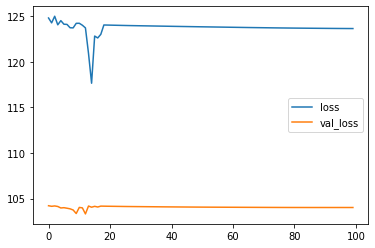

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
model.save('model1')

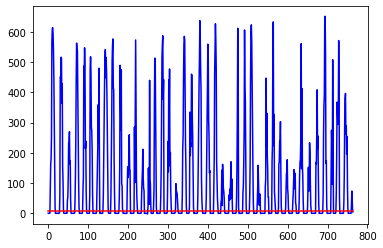

In [ ]:
new_model = keras.models.load_model('model1')


predict = new_model.predict(X_train)
plt.plot(y_train,'b')
plt.plot(predict,'r')


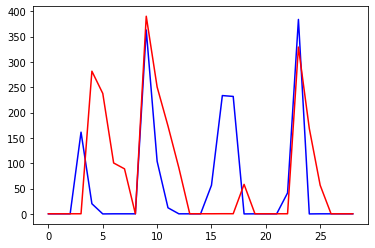

In [ ]:
predict = new_model.predict(X_val)
plt.plot(y_val,'b')
plt.plot(predict,'r')

array([[530.26495]], dtype=float32)

In [ ]:
from keras.layers import LSTM

class LSTM(keras.Sequential):
  def __init__(self, layer, units, activation, input_shape, dropout_rate, optimizer, loss):
    super().__init__()
    self.add(layers.LSTM(units=units,return_sequences=True,activation=activation,input_shape=input_shape))
    #self.add(layers.Dropout(dropout_rate))
    #self.add(layers.BatchNormalization())
    for i in range(2,layer):
      self.add(layers.LSTM(units=units,return_sequences=True,activation=activation))
      #self.add(layers.Dropout(dropout_rate))
      #self.add(layers.BatchNormalization())
    self.add(layers.LSTM(units=units,activation=activation))
    self.add(layers.Dense(units=1))
    self.compile(optimizer=optimizer,loss=loss)

def make_continuous_set(data,model):
  _X = []
  _y = []
  _data = data.copy()
  i = 0
  cnt=0
  while i < len(_data):
    if len(_data[i])!=9:
      x_value = _data[i]
      y_value = new_model.predict([x_value])
      _data[i].insert(1,y_value[0])
      print(i)
    i += 1
  for i in range(0,len(_data)):
    _X.append(_data[i][0]+_data[i][2:9])
    _y.append(_data[i][1])
  return _X,_y,_data

print(len(ordered_data[144]))
L_X,L_y,continuous_data = make_continuous_set(ordered_data,new_model)

print(X)

L_layer = 3
L_units = 128
L_activation = 'relu'
L_input_shape = (24,8)
L_dropout_rate = 0.1
L_optimizer = 'adam'
L_loss = 'mae'
L_batch_size = 1
L_epochs = 100

L_model = LSTM(L_layer,L_units,L_activation,L_input_shape,L_dropout_rate,L_optimizer,L_loss)



8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


KeyboardInterrupt: ignored

18191


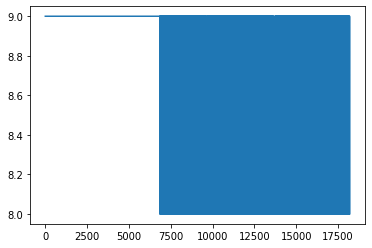

In [ ]:
print(len(ordered_data))
bb= [len(ordered_data[i]) for i in range(0,len(ordered_data))]
cc= [ordered_data[i][0] for i in range(0,len(ordered_data))]

plt.plot(bb)

In [ ]:
L_history = L_model.fit(
    L_X, L_y,
    validation_split = 0.1,
    batch_size=L_batch_size,
    epochs=L_epochs,
    verbose=1, # suppress output since we'll plot the curves
)

KeyError: ignored

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));